In [1]:
# pip install shap

In [2]:
import pandas as pd
import modules

from modules import ml_functions

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

New version file.py

# 1.0 Data retrieval

In [3]:
df = pd.read_pickle('../../data_lake/output/2_dp.pkl')

In [4]:
df.sample(1)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
SegFile,,,,,,,,,,,,,,,,,,,,,,,,
CTG0110.txt,125.0,125.0,0.0,1.0,0.0,25.0,1.5,0.0,19.3,0.0,0.0,0.0,62.0,80.0,142.0,4.0,1.0,127.0,125.0,127.0,6.0,1.0,3.0,1.0


# 2.0 Data preparation

In [5]:
# for i in df:
#     if df[i].dtype == 'object':
#         df[i] = df[i].astype(str)

In [6]:
# df = df.drop(columns='CLASS')

In [7]:
df_ml = df.copy()

# 3.0 Modeling
## 3.1 Classe 1

In [8]:
class_nsp = 1.0

In [9]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [10]:
X_train, X_test, y_train, y_test, numerical_cols, categorical_cols, parameters = ml_functions.data_splitting(df_model)

(942, 23)
AUC Score:  0.4935122146575891
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar


In [11]:
model = ml_functions.model_training(X_train, y_train, numerical_cols, categorical_cols, parameters)

GridSearchCV results...
Mean Train Scores: 
[0.99568382 0.99601549 0.99634772 0.99701162]

Mean CV Scores: 
[0.98138631 0.98405298 0.98138631 0.98139514]

Best Parameters: 
{'model__depth': 3, 'model__iterations': 1000}



Test results...
Model Test Accuracy: 0.9894179894179894
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['AC', 'MSTV', 'ASTV', 'ALTV', 'DP', 'Mean', 'UC', 'Mode', 'Variance', 'Max']


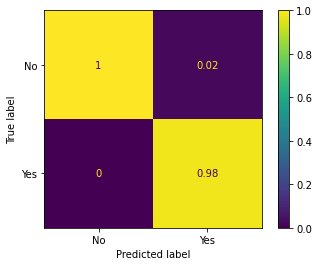

In [12]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [13]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

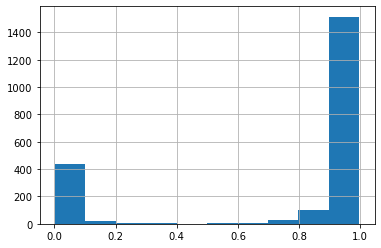

In [14]:
df['proba_classe_1.0'].hist()

## 3.2 Classe 2

In [15]:
class_nsp = 2.0

In [16]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [17]:
X_train, X_test, y_train, y_test, numerical_cols, categorical_cols, parameters = ml_functions.data_splitting(df_model)

(590, 23)
AUC Score:  0.553923076923077
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar


In [18]:
model = ml_functions.model_training(X_train, y_train, numerical_cols, categorical_cols, parameters)

GridSearchCV results...
Mean Train Scores: 
[0.98970796 0.99152431 0.99515884 0.99455278]

Mean CV Scores: 
[0.96608875 0.96852777 0.96849838 0.97334705]

Best Parameters: 
{'model__depth': 3, 'model__iterations': 200}



Test results...
Model Test Accuracy: 0.9717514124293786
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['AC', 'ALTV', 'DP', 'ASTV', 'Width', 'Max', 'Median', 'FM', 'LBE', 'LB']


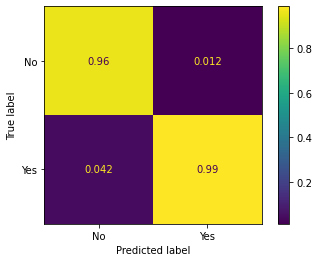

In [19]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [20]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

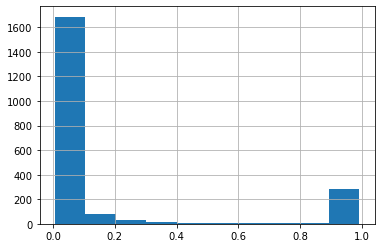

In [21]:
df['proba_classe_2.0'].hist()

## 3.3 Classe 3

In [22]:
class_nsp = 3.0

In [23]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [24]:
X_train, X_test, y_train, y_test, numerical_cols, categorical_cols, parameters = ml_functions.data_splitting(df_model)

(352, 23)
AUC Score:  0.5189795918367347
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar


In [25]:
model = ml_functions.model_training(X_train, y_train, numerical_cols, categorical_cols, parameters)

GridSearchCV results...
Mean Train Scores: 
[1. 1. 1. 1.]

Mean CV Scores: 
[0.99591837 0.99591837 0.99591837 0.99591837]

Best Parameters: 
{'model__depth': 2, 'model__iterations': 100}



Test results...
Model Test Accuracy: 1.0
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['ALTV', 'ASTV', 'DP', 'Mean', 'Median', 'AC', 'MSTV', 'Variance', 'Mode', 'Min']


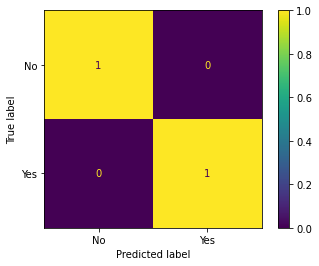

In [26]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [27]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

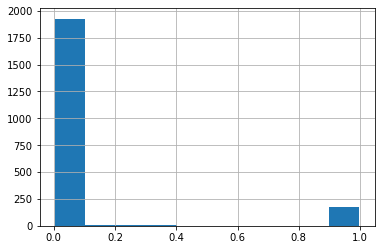

In [28]:
df['proba_classe_3.0'].hist()

# 4.0 Output

In [29]:
cols = ['proba_classe_1.0','proba_classe_2.0', 'proba_classe_3.0']

In [30]:
df[cols] = df[cols].apply(lambda x: x / x.sum(),axis=1)

In [39]:
df.sample(4)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,proba_classe_1.0,proba_classe_2.0,proba_classe_3.0
SegFile,,,,,,,,,,,,,,,,,,,,,,,,,,,
CTG2039.txt,128.0,128.0,0.0,2.0,7.0,65.0,2.6,0.0,0.0,5.0,0.0,2.0,129.0,63.0,192.0,6.0,0.0,103.0,92.0,114.0,28.0,0.0,8.0,3.0,0.012243,0.040742,0.947016
CTG0448.txt,142.0,142.0,0.0,3.0,0.0,68.0,0.3,38.0,6.7,0.0,0.0,0.0,15.0,136.0,151.0,1.0,0.0,142.0,142.0,143.0,0.0,0.0,10.0,2.0,0.006766,0.959610,0.033624
CTG1545.txt,144.0,144.0,2.0,0.0,6.0,48.0,0.7,6.0,10.2,0.0,0.0,0.0,47.0,120.0,167.0,3.0,0.0,148.0,149.0,150.0,3.0,0.0,2.0,1.0,0.965710,0.028800,0.005491
CTG0408.txt,150.0,150.0,0.0,0.0,0.0,76.0,0.3,31.0,5.4,0.0,0.0,0.0,11.0,146.0,157.0,1.0,0.0,154.0,153.0,155.0,0.0,1.0,10.0,2.0,0.003747,0.962448,0.033805
